In [1]:
import nltk
nltk.download('punkt')
import numpy as np
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/mustafa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('/Users/mustafa/Desktop/student age prediction task/reading-age-data.csv', encoding='latin-1')
df=df.rename(columns={'v1': 'Excerpt','v2': 'Book and Page','v3': 'Age'})

In [3]:
df.groupby('Age').describe() #75 percent pe mean, freq mean repetition and unique means 56

autotag                                                    
      count       mean       std  min    25%   50%    75%   max
Age                                                            
1      60.0   2.300000  2.226954  1.0   1.00   1.0   3.00  12.0
2      97.0   3.288660  2.601917  1.0   2.00   2.0   3.00  16.0
3     137.0   4.445255  3.603348  1.0   3.00   3.0   4.00  18.0
4     315.0   4.914286  2.912025  1.0   3.00   4.0   5.00  16.0
5     333.0   5.243243  2.625923  1.0   4.00   5.0   6.00  16.0
6     330.0   6.500000  3.072824  2.0   4.25   6.0   8.00  26.0
7     523.0   7.267686  3.138112  1.0   5.00   7.0   8.00  26.0
8     698.0   7.717765  2.863063  1.0   7.00   8.0   8.00  26.0
9     860.0   8.318605  2.759828  1.0   7.00   9.0   9.00  26.0
10    824.0   8.921117  3.054362  2.0   7.00  10.0  10.00  26.0
11    958.0   9.415449  2.714690  1.0   8.00  11.0  11.00  18.0
12    444.0  10.040541  2.955376  1.0   9.00  11.0  12.00  18.0
13    244.0  10.155738  2.992502  1.0   9.00  10.0  13.00  18.0
14    424.0  11.584906  4.544225  1.0   8.75  12.0  14.00  25.0
15    160.0  12.618750  4.690244  2.0   9.00  14.0  15.00  25.0
16    161.0  12.055901  5.959497  2.0   7.00  12.0  16.00  25.0
17    287.0  13.529617  4.399419  3.0  10.00  14.0  17.00  24.0
18    177.0  15.299435  5.874217  2.0  11.00  15.0  18.00  28.0
19     89.0  11.651685  5.040971  2.0   8.00  11.0  15.00  28.0
20     49.0  12.755102  5.903850  3.0   8.00  11.0  20.00  20.0
21     56.0   9.053571  5.286070  2.0   5.00   8.5  11.00  21.0
22     21.0  16.285714  4.627557  7.0  16.00  16.0  22.00  22.0
23     33.0  10.393939  4.534172  3.0   8.00  10.0  11.00  23.0
24    113.0  15.380531  5.127514  4.0  11.00  17.0  17.00  24.0
25     50.0  15.480000  7.290587  2.0   9.00  15.0  23.25  26.0
26     46.0  11.782609  5.357914  2.0   9.00  10.0  14.00  26.0
28     82.0  16.121951  5.772199  2.0  11.00  18.0  18.00  28.0

In [4]:
df['length'] = df['Excerpt'].apply(len)
df.head()

,Excerpt,Book and Page,Age,autotag,length
0,Tom and Ifra tug the big carrot.,,1,1,32
1,"Tom, Ifra, Nick and Lin tug.",,1,1,28
2,"Tom, Ifra, Nick, Lin and Sam tug.",,1,1,33
3,"Nick, Lin, Sam and Kit tug.",,1,1,27
4,Up pops the big carrot!,,1,3,23


In [5]:
df_labels = df['Age']
df_labels.head(11)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Age, dtype: int64

In [6]:
# MEASURE LEANGTH OF MESSAGES
df['length'] = df['Excerpt'].apply(len)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSu

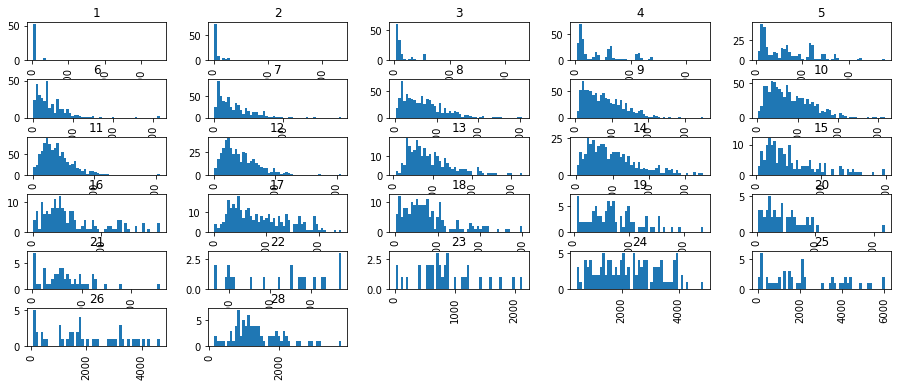

In [7]:
# SHOW LENGTH IN GRAPHICAL FORM
df.hist(column='length',by='Age',bins=50, figsize=(15,6))

In [8]:
#Data cleaning starts

df['Excerpt'] = df.Excerpt.map(lambda x: x.lower())
df['Excerpt'] = df.Excerpt.str.replace('[^\w\s]', ' ') #remove comma and spaces

In [9]:
df['Excerpt'] = df['Excerpt'].apply(nltk.word_tokenize)

stops = set(stopwords.words("english")) 

In [10]:
stemmer = PorterStemmer()
df['Excerpt'] = df['Excerpt'].apply(lambda x: [stemmer.stem(y) for y in x]) #picks prefix and lem converts

In [11]:
show = df['Excerpt']
show.head()

0    [tom, and, ifra, tug, the, big, carrot]
1           [tom, ifra, nick, and, lin, tug]
2      [tom, ifra, nick, lin, and, sam, tug]
3            [nick, lin, sam, and, kit, tug]
4                [up, pop, the, big, carrot]
Name: Excerpt, dtype: object

In [12]:
df['Excerpt'] = df['Excerpt'].apply(lambda x: ' '.join(x)) 
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df['Excerpt']);  #count numeric values of tokens

In [13]:
transformer = TfidfTransformer().fit(counts)  #transform to numeric values
counts = transformer.fit_transform(counts)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(counts, df['Age'], test_size=0.3, random_state=69) #

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB #works on text
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [16]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred)) #cant tell properly because of so much age data cause of 28 numeric values

[[ 15   2   0   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  3  17   1   0   3   0   2   0   2   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  2   2  15   3   1   0   3   3   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  1   9  10  69   2   0   2   3   3   1   1   0   0   1   0   1   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   1   8  14  66   3   3   5   3   1   1   1   0   0   0   0   0   1
    0   0   0   0   0   0   0   0   0]
 [  0   3   3   4   3  70   5   7   3   0   9   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  1   0   7   7   9  11  77  22  13   1   6   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0]
 [  0   4   2   5   3   7  26 118  17   3   3   0   0   1   0   0   1   0
    0   1   0   0   0   0   0   0   0]
 [  1   2   3   8   4   7   9  27 165  23   6   0   0   1   0   0   0   1
    0   0   0   0   0 

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.46875


In [20]:
# implementing adabost 
ab = AdaBoostClassifier().fit(X_train, y_train)

In [21]:
predicted = ab.predict(X_test)

print(np.mean(predicted == y_test))

0.1483274647887324


In [22]:
# implementing naive bayes
NB = MultinomialNB().fit(X_train, y_train)

In [23]:
predicted = NB.predict(X_test)
print(np.mean(predicted == y_test))

0.2834507042253521


In [24]:
print(confusion_matrix(y_test, predicted))

[[  0   0   0   0   0   0   0   5   3   4   8   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   8   3  15   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6   8   4  11   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   6  32  14  51   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   5  33  20  48   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3  24  15  65   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5  20  30  11  89   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2  80  40  18  51   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 168  40  44   0   0   0   0   0   0   0
    0   0   0   0   0 

In [25]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        29
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00       103
           5       1.00      0.01      0.02       107
           6       0.00      0.00      0.00       107
           7       0.71      0.03      0.06       155
           8       0.59      0.42      0.49       191
           9       0.36      0.65      0.46       257
          10       0.34      0.57      0.43       232
          11       0.20      0.86      0.33       298
          12       0.25      0.02      0.03       118
          13       0.00      0.00      0.00        82
          14       0.00      0.00      0.00       129
          15       0.00      0.00      0.00        46
          16       0.00      0.00      0.00        54
          17       0.00      0.00      0.00        85
          18       0.00    

/Users/mustafa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# implementing SVM
sv = SVC().fit(X_train, y_train)

In [29]:
predicted = sv.predict(X_test)
print(np.mean(predicted == y_test))

0.3692781690140845


In [30]:
print(confusion_matrix(y_test, predicted))

[[  7   2   1   1   0   0   1   3   2   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   6   0   1   1   0   0   6   9   2   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   9   2   3   0   1   9   4   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   1  55   3   0   3  11  16   4   9   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   8  52   1   3  11  20   7   5   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   3  40   5  12  20   6  17   1   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   6  55  35  33   5  20   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  23 113  38   6   9   2   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   1  22 181  37  14   0   0   0   0   0   0   0
    0   0   0   0   0 

In [31]:
#print(classification_report(y_test,predicted))

In [32]:
# implementing disession tree

dt = DecisionTreeClassifier().fit(X_train, y_train)

In [33]:
predicted = dt.predict(X_test)

print(np.mean(predicted == y_test))

0.2108274647887324


In [34]:
print(confusion_matrix(y_test, predicted))

[[11  4  3  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 4  8  3  3  3  1  2  1  2  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 1  2 12  2  4  2  0  2  1  1  0  0  1  1  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 2  3  9 38 16  5  4  7  6  4  2  0  0  3  1  2  0  0  0  1  0  0  0  0
   0  0  0]
 [ 1  1 13 17 28  8  7  8 10  4  4  0  1  0  0  4  0  0  0  0  0  0  0  0
   0  1  0]
 [ 2  0  5 12  9 26  8 16  8  7  6  0  0  2  2  2  0  0  0  1  0  0  0  0
   0  1  0]
 [ 1  2  3  9 10 11 19 38 22 13 12  1  1  6  1  2  1  1  1  0  0  0  0  1
   0  0  0]
 [ 2  0  5  4  8  9 38 59 22 13 17  4  0  4  1  1  0  1  0  0  3  0  0  0
   0  0  0]
 [ 0  3  0  5 10 12 20 36 74 44 23 11  1 11  2  2  1  1  1  0  0  0  0  0
   0  0  0]
 [ 0  0  2  8  8  8 10 17 51 58 44  3 10  4  2  2  2  1  1  0  0  0  0  0
   0  1  0]
 [ 0  1  1  3  6  4 14 11 21 54 87 76  9  7  1  1  0  0  0  0  0  0  0  1
   0  1  0]
 [ 0  0  1  0  2  0  1  2  2  6 59  5  1 38  0  0  0  

In [35]:
my_dataset = pd.read_csv('/Users/mustafa/Desktop/student age prediction task/reading-age-data.csv', encoding='latin-1')

In [36]:
# converting content to lower case
pred = (my_dataset['Excerpt'].str.lower())
# printing predictions made by model
print("prediction: {}". format(classifier.predict(count_vect.transform(pred.values.astype('U')))))
# saving predictions in a variable
my_pred = dt.predict(count_vect.transform(pred.values.astype('U')))
# saving predicted labels in .csv file
my_dataset['autotag'] = my_pred
my_dataset.to_csv('/Users/mustafa/Desktop/student age prediction task/reading-age-data.csv',index = False)

prediction: [ 1  1  1 ...  8  1 15]
